In [1]:
# чтобы предупреждения глаза не мазолили
import warnings
warnings.filterwarnings('ignore')

import torch
import pandas as pd

import my_dataset
import train
import model

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
DATASET_PATH = 'dataset/'

f0_channel_1, f0_channel_2, f0_channel_3 = my_dataset.load_data(DATASET_PATH + '0.txt')

f01_channel_1, f01_channel_2, f01_channel_3 = my_dataset.load_data(DATASET_PATH + '0_1.txt')
f02_channel_1, f02_channel_2, f02_channel_3 = my_dataset.load_data(DATASET_PATH + '0_2.txt')

f1_channel_1, f1_channel_2, f1_channel_3 = my_dataset.load_data(DATASET_PATH + '1.txt')
f11_channel_1, f11_channel_2, f11_channel_3 = my_dataset.load_data(DATASET_PATH + '1_1.txt')
f12_channel_1, f12_channel_2, f12_channel_3 = my_dataset.load_data(DATASET_PATH + '1_2.txt')

f2_channel_1, f2_channel_2, f2_channel_3 = my_dataset.load_data(DATASET_PATH + '2.txt')
f21_channel_1, f21_channel_2, f21_channel_3 = my_dataset.load_data(DATASET_PATH + '2_1.txt')
f22_channel_1, f22_channel_2, f22_channel_3 = my_dataset.load_data(DATASET_PATH + '2_2.txt')

f3_channel_1, f3_channel_2, f3_channel_3 = my_dataset.load_data(DATASET_PATH + '4.txt')
f31_channel_1, f31_channel_2, f31_channel_3 = my_dataset.load_data(DATASET_PATH + '4_1.txt')
f32_channel_1, f32_channel_2, f32_channel_3 = my_dataset.load_data(DATASET_PATH + '4_2.txt')

f4_channel_1, f4_channel_2, f4_channel_3 = my_dataset.load_data(DATASET_PATH + '6.txt')
f41_channel_1, f41_channel_2, f41_channel_3 = my_dataset.load_data(DATASET_PATH + '6_1.txt')
f42_channel_1, f42_channel_2, f42_channel_3 = my_dataset.load_data(DATASET_PATH + '6_2.txt')

f5_channel_1, f5_channel_2, f5_channel_3 = my_dataset.load_data(DATASET_PATH + '10.txt')
f51_channel_1, f51_channel_2, f51_channel_3 = my_dataset.load_data(DATASET_PATH + '10_1.txt')
f52_channel_1, f52_channel_2, f52_channel_3 = my_dataset.load_data(DATASET_PATH + '10_2.txt')

f6_channel_1, f6_channel_2, f6_channel_3 = my_dataset.load_data(DATASET_PATH + '15.txt')
f61_channel_1, f61_channel_2, f61_channel_3 = my_dataset.load_data(DATASET_PATH + '15_1.txt')
f62_channel_1, f62_channel_2, f62_channel_3 = my_dataset.load_data(DATASET_PATH + '15_2.txt')

f7_channel_1, f7_channel_2, f7_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль.txt')
f71_channel_1, f71_channel_2, f71_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_1.txt')
f72_channel_1, f72_channel_2, f72_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_2.txt')
f73_channel_1, f73_channel_2, f73_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_3.txt')


In [4]:
from dataset_processing import split_data_to_dataframe
NUM_CLASSES = 8
FRAME = 10000
STRIDE = 3000
SMOOTHING = 5

f0_dataset = split_data_to_dataframe(f0_channel_1, f0_channel_2, f0_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f01_dataset = split_data_to_dataframe(f01_channel_1, f01_channel_2, f01_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f02_dataset = split_data_to_dataframe(f02_channel_1, f02_channel_2, f02_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f1_dataset = split_data_to_dataframe(f1_channel_1, f1_channel_2, f1_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f11_dataset = split_data_to_dataframe(f11_channel_1, f11_channel_2, f11_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f12_dataset = split_data_to_dataframe(f12_channel_1, f12_channel_2, f12_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f2_dataset = split_data_to_dataframe(f2_channel_1, f2_channel_2, f2_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f21_dataset = split_data_to_dataframe(f21_channel_1, f21_channel_2, f21_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f22_dataset = split_data_to_dataframe(f22_channel_1, f22_channel_2, f22_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f3_dataset = split_data_to_dataframe(f3_channel_1, f3_channel_2, f3_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f31_dataset = split_data_to_dataframe(f31_channel_1, f31_channel_2, f31_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f32_dataset = split_data_to_dataframe(f32_channel_1, f32_channel_2, f32_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f4_dataset = split_data_to_dataframe(f4_channel_1, f4_channel_2, f4_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f41_dataset = split_data_to_dataframe(f41_channel_1, f41_channel_2, f41_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f42_dataset = split_data_to_dataframe(f42_channel_1, f42_channel_2, f42_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f5_dataset = split_data_to_dataframe(f5_channel_1, f5_channel_2, f5_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f51_dataset = split_data_to_dataframe(f51_channel_1, f51_channel_2, f51_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f52_dataset = split_data_to_dataframe(f52_channel_1, f52_channel_2, f52_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f6_dataset = split_data_to_dataframe(f6_channel_1, f6_channel_2, f6_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f61_dataset = split_data_to_dataframe(f61_channel_1, f61_channel_2, f61_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f62_dataset = split_data_to_dataframe(f62_channel_1, f62_channel_2, f62_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f7_dataset = split_data_to_dataframe(f7_channel_1, f7_channel_2, f7_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f71_dataset = split_data_to_dataframe(f71_channel_1, f71_channel_2, f71_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f72_dataset = split_data_to_dataframe(f72_channel_1, f72_channel_2, f72_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f73_dataset = split_data_to_dataframe(f73_channel_1, f73_channel_2, f73_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING) 




In [5]:
f73_dataset

,data,label
0,"[547.1558240001242, 6.000380074360294, 7.08179...",7
1,"[551.1563412536414, 8.131507765966703, 8.84757...",7
2,"[547.9043306247148, 6.529586591507802, 8.52927...",7
3,"[548.0148947513131, 6.973815728980231, 8.38134...",7
4,"[549.6346389661043, 11.177333833570819, 13.063...",7
5,"[548.4417836535077, 9.330334165548297, 9.86293...",7
6,"[550.1887938672563, 10.434089749663771, 12.709...",7
7,"[552.1359529918615, 10.55977081252718, 12.6197...",7
8,"[546.9431361903058, 6.687661106624795, 7.15528...",7


In [6]:

final_dataset = pd.concat([f0_dataset, f01_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f02_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f1_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f11_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f12_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f2_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f21_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f22_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f3_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f31_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f32_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f4_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f41_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f42_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f5_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f51_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f52_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f6_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f61_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f62_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f7_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f71_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f72_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f73_dataset], ignore_index=True)


In [7]:
final_dataset

,data,label
0,"[540.6701354310643, 7.586658487255329, 5.00114...",0
1,"[536.2583631939614, 5.831798516176202, 5.39740...",0
2,"[533.3449376281127, 3.4640180470965234, 3.1963...",0
3,"[533.3464255743343, 2.7440644304729345, 2.5534...",0
4,"[533.3804737736402, 1.6933502841190118, 1.6123...",0
...,...,...
385,"[549.6346389661043, 11.177333833570819, 13.063...",7
386,"[548.4417836535077, 9.330334165548297, 9.86293...",7
387,"[550.1887938672563, 10.434089749663771, 12.709...",7
388,"[552.1359529918615, 10.55977081252718, 12.6197...",7


In [8]:
train_dataset, valid_dataset, test_dataset = my_dataset.train_val_test_split(final_dataset)

In [9]:
train_dataset

,data,label
371,"[549.869938338282, 9.306578157470012, 13.21213...",7
279,"[549.2978431533169, 13.12815031193786, 21.5130...",5
77,"[547.4286384087374, 10.667466577571192, 11.039...",1
98,"[549.7638210880177, 11.677337569068541, 12.817...",2
256,"[539.1840099867692, 7.432690413714909, 8.94937...",5
...,...,...
9,"[538.1074136241643, 6.79102089644183, 6.448882...",0
291,"[545.0216533310729, 11.69817341519904, 20.3304...",5
54,"[544.3935795850542, 6.409580539877071, 8.94144...",1
53,"[543.992504951917, 5.763309122083472, 7.294959...",1


In [10]:
train_dataset = train_dataset.reset_index(drop=True)
valid_dataset = valid_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [11]:
from custom_dataset import CustomDataset

train = CustomDataset(train_dataset)
valid = CustomDataset(valid_dataset)
test = CustomDataset(test_dataset)

In [12]:
print(train.data_frame)

                                                  data  label
0    [549.869938338282, 9.306578157470012, 13.21213...      7
1    [549.2978431533169, 13.12815031193786, 21.5130...      5
2    [547.4286384087374, 10.667466577571192, 11.039...      1
3    [549.7638210880177, 11.677337569068541, 12.817...      2
4    [539.1840099867692, 7.432690413714909, 8.94937...      5
..                                                 ...    ...
229  [538.1074136241643, 6.79102089644183, 6.448882...      0
230  [545.0216533310729, 11.69817341519904, 20.3304...      5
231  [544.3935795850542, 6.409580539877071, 8.94144...      1
232  [543.992504951917, 5.763309122083472, 7.294959...      1
233  [559.8645855673027, 23.36012908740637, 24.6830...      4

[234 rows x 2 columns]


In [13]:
from torch.utils.data import DataLoader

batch_size = 32 # размер батча
train = DataLoader(train, batch_size=batch_size, shuffle=True)
valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
test = DataLoader(test, batch_size=batch_size, shuffle=False)


In [14]:
print(len(train))
for (data, label) in train:
    print(data.shape)
    print(label.shape)
    break

8
torch.Size([32, 1, 1, 3000])
torch.Size([32, 1])


In [1]:
import model
from train import train_model

net = model.Perceptron(3000, 8).to(device)

loss_history, best_model = train_model(train, valid, net, epochs=50, device=device)

NameError: name 'device' is not defined

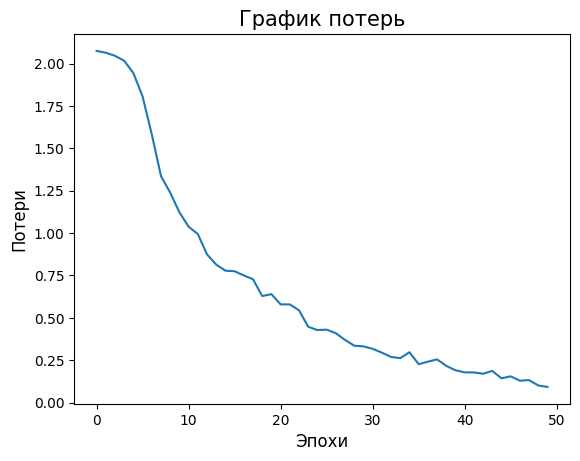

In [16]:
from matplotlib import pyplot as plt

plt.title('График потерь',fontsize=15)
plt.xlabel('Эпохи',fontsize=12)
plt.ylabel('Потери',fontsize=12)
plt.plot(loss_history)

plt.show()

In [17]:
from train import test_model

y_pred_test = test_model(model=best_model, loader_test=test, device=device)

In [18]:
import sklearn.metrics as metrics
import numpy as np

y_true_test = np.array(test_dataset["label"])

result_total = metrics.f1_score(y_true_test, y_pred_test, average='micro')
class_results = metrics.f1_score(y_true_test, y_pred_test, average=None)


print("Оценка качества F1 (общая):", result_total)
print()
print("Оценка качества F1 по классам:")
print("Оценка качества F1 (0):", class_results[0])
print("Оценка качества F1 (1):", class_results[1])
print("Оценка качества F1 (2):", class_results[2])
print("Оценка качества F1 (3):", class_results[3])
print("Оценка качества F1 (4):", class_results[4])
print("Оценка качества F1 (5):", class_results[5])
print("Оценка качества F1 (6):", class_results[6])
print("Оценка качества F1 (7):", class_results[7])

Оценка качества F1 (общая): 0.7307692307692307

Оценка качества F1 по классам:
Оценка качества F1 (0): 0.8235294117647058
Оценка качества F1 (1): 0.8571428571428571
Оценка качества F1 (2): 0.7368421052631579
Оценка качества F1 (3): 0.6153846153846154
Оценка качества F1 (4): 0.47058823529411764
Оценка качества F1 (5): 0.631578947368421
Оценка качества F1 (6): 0.782608695652174
Оценка качества F1 (7): 1.0
